In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op

In [38]:
data = np.loadtxt("ex2data2.txt", delimiter = ',')
X = data[:, 0 : 2]
y = data[:, 2]
m = len(y)
X = X.reshape(m, 2)
y = y.reshape(m, 1)

In [39]:
def plotData(X, y):
    pos = np.where(y == 1)
    neg = np.where(y == 0)
    plt.plot(X[pos, 0], X[pos, 1], 'k+', markersize = 8, linewidth = 10)
    plt.plot(X[neg, 0], X[neg, 1], 'ko', markersize = 8, markerfacecolor = 'y')

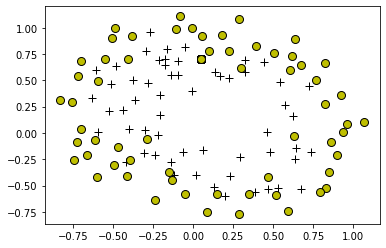

In [40]:
plotData(X,y)

In [41]:
def mapFeature(X1, X2):
    m = X1.shape[0]
    degree = 6
    out = np.ones((m, 1))
    cnt = 1
    for i in range(1, degree + 1):
        for j in range(i + 1):
            x = np.power(X1, i - j) * np.power(X2, j)
            out = np.hstack((out, x))
            cnt += 1
    out = out.reshape(m, cnt)
    return out

In [42]:
X1 = data[:, 0].reshape(m, 1)
X2 = data[:, 1].reshape(m, 1)
out = mapFeature(X1, X2)
out.shape

(118, 28)

In [22]:
def sigmoid(z):
    g = 1/ (1 + np.exp(-z))
    return g

In [50]:
def costFunctionReg(theta, X, y, lamda):
    m, n = X.shape
    theta = theta.reshape(n, 1)
    tmp1 = np.log(sigmoid(np.dot(X, theta)))
    s1 = np.dot(y.T, tmp1)
    tmp2 = np.log(1 - sigmoid(np.dot(X, theta)))
    s2 = np.dot((1 - y).T, tmp2)
    s3 = np.dot(theta.T, theta) - theta[0,0] * theta[0,0]
    cost = -1 / m * (s1 + s2) + lamda / 2 / m * s3
    return cost

In [51]:
def gradientReg(theta, X, y, lamda):
    m, n = X.shape
    theta = theta.reshape(n, 1)
    s1 = np.dot(X.T, sigmoid(np.dot(X, theta)) - y)
    s2 = theta
    s2[0,0] = 0
    gradient = 1 / m * s1 + lamda / m * s2
    return gradient

In [52]:
initial_theta = np.zeros(out.shape[1])
lamda = 1
cost = costFunctionReg(initial_theta, out, y, lamda)
grad = gradientReg(initial_theta, out, y, lamda)
grad[0:5, 0]

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02])

In [53]:
theta = np.zeros(out.shape[1])
result = op.minimize(fun = costFunctionReg, x0 = theta, args = (out, y, lamda), method = 'TNC', jac = gradientReg)
theta = result['x']

In [54]:
def plotDecisionBoundary(theta, X, y):
    plotData(X[:, 1 : 3], y)
    
    if X.shape[1] <= 3:
        x1 = np.array([np.amin(X[:,1]) - 2, np.amax(X[:,1]) + 2])
        x2 = -(theta[0] + theta[1] * x1) / theta[2]
        plt.plot(x1, x2)
    else:
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)
        z = np.zeros((len(u), len(v)))
        
        for i in range(len(u)):
            for j in range(len(v)):
                z[i, j] = np.dot(mapFeature(np.array([u[i]]).reshape(1,1), np.array([v[j]]).reshape(1,1)), theta)
        plt.contour(u, v, z.T, [0])

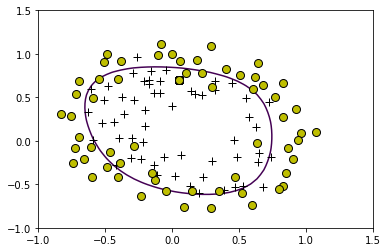

In [55]:
plotDecisionBoundary(theta, out, y)

In [56]:
def predict(theta, X):
    m = X.shape[0]
    p = np.zeros((m, 1))
    
    p = np.round(sigmoid(np.dot(X, theta)))
    return p

In [57]:
p = predict(theta, out).reshape(m,1)
print(np.mean(p == y) * 100)

83.05084745762711
